<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/main/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Differential equations**
**Nolwenn Deschand**

# **Abstract**

In this lab, we will implement time stepping methods for solving differential equations, more particularly initial value problems of the form $\frac{du}{dt} = f(u,t)$.

#**About the code**

In [ ]:
"""This program is a lab report using the provided template"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# written by Nolwenn Deschand (deschand@kth.se)
# Template by Johan Hoffman


'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [2]:
# Load neccessary modules.
from google.colab import files

import numpy as np
from scipy import optimize
import math
import random

from matplotlib import pyplot as plt


# **Introduction**

In this lab, we will implement time stepping methods for solving scalar initial value problems and systems of initial value problems, that is ordinary differential equations of the form $\frac{du}{dt} = f(u,t)$. Time stepping methods allows to successively approximate the solution $U_n = U(t_n)$.

There are different time stepping methods, some as the Forward Euler method are explicit, meaning that $U_n$ is directly computable from the previous approximation $U_{n−1}$ in the time stepping algorithm, while the Backward Euler method is implicit, meaning that $U_n$ is not directly obtained from $U_{n−1}$.

Explicit methods are easier to implement, but they are less stable: the Forward Euler method is conditionally stable, while Backward Euler method and the trapezoidal method are unconditionally stable.

For this lab, I chose to implement thr Forward Euler Method, also called the explicit Euler method.

---

The formulas and algorithms used in this lab come from the chapters 13 and 14 of the book *Methods in Computational Science*, from Johan Hoffman.

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)



# **Method**

**Implementation of the time stepping for scalar initial value problem du/dt = f(u,t)**

To solve this scalar initial value problem with a time stepping method, we will use the Foward Euler method, an explicit method. 

The successive approximation is given by the following update formula:
$U_n = U_{n−1} +k_nf(U_{n−1},t_{n−1})$.

We will implement it using the algorithm 13.1 in the book:
```
ALGORITHM 13.1. f = explicit_euler_method(f, u0, t0, T, k).
Input: function f, initial data u0, initial time t0, final time T, time step k. 
Output: approximation at final time u.
1: t=t0 
2: while t < T do
3:     u = u0 + k*f(u0,t)
4:     u0 = u
5:     t = t+k
6: endwhile 
7: return u
```

The function implemented will take as input the final time T, the function $f(u,t)$, and the initial value $u(0)$, but also a time step interval k.
As an output, the function will return the appproximation approximation $U(t_n)$ for the time interval $[0,T]$, but also all the time steps for testing purpose.

In [53]:
def explicit_euler(f, u0, t0, T, k):
  t = t0 
  u = 0
  steps = []
  steps.append(u0)
  time = []
  time.append(t)
  while t < T:
     u = u0 + k*f(u0,t)
     u0 = u
     t = t + k
     steps.append(u)
     time.append(t)
  return u, steps, time

**Implementation of the time stepping for a system of initial value problems du/dt = f(u,t)**

Time stepping methods for systems of initial value problems are analogous to the scalar initial value problem, with the difference that this time U is a vector instead of a scalar. We use the same implementation as before, that is slightly modified for handling vectors.

The function implemented will take as input the final time T, the function $f(u,t)$, and the initial value vector $u(0)$, but also a time step interval k.
As an output, the function will return the appproximation approximation $U(t_n)$ for the time interval $[0,T]$, but also all the time steps for testing purpose.

In [73]:
def explicit_euler_system(f, u0, t0, T, k):
  t = t0 
  n = u0.shape[0]
  u = np.zeros((n,1))
  steps = np.zeros((n,round(T/k)+2))
  time = []
  for i in range(n):
       steps[i][0] = u0[i]
  time.append(t)
  j = 0
  while t < T:
     u = u0 + k*f(u0,t)
     u0 = u
     t = t + k
     for i in range(n):
       steps[i][j] = u[i]
     time.append(t)
     j += 1
  return u, steps, time

# **Results**

**Implementation of the time stepping for scalar initial value problem du/dt = f(u,t)**

To test our implementation, we will start by verifying accuracy by comparing the approximation with the exact solution.

We chose $f(u,t) = λu(t)$ and the exact solution of $\frac{du}{dt} = f(u,t)$ is therefore $u(t) = u_0 e^{λt}$ where λ is a complex number with negative real part $Re(λ) < 0$ and $u_0 =1$.

We will also verify the stability of the method. The concept of stability refers to how small perturbations propagate in time and, in the context of time stepping methods, how local approximation errors accumulate from one time step to the next.

According to the book p 287, for our specific problem, if a method with constant time step k converges to zero as $t → ∞$, as the exact solution does, the method is said to be A-stable.
For the explicit Euler method to be A-stable, the following condition on kλ must be respected:  $|1 + kλ| < 1 ⇔ | − 1 − kλ| < 1$


Here, we choose λ to be a random integer in $[-10, -1]$. This means for the method to be stable, k must be in $[0, 0.2]$.

We will first plot the result for a random λ with a k value that guarantees the stability, and then with k = 0.5, where the approximation should not be stable.

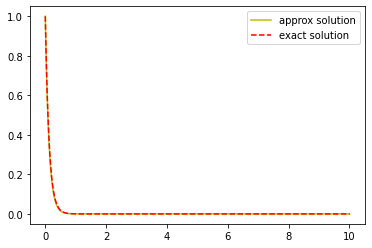

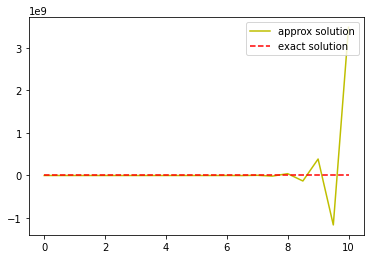

In [132]:
# Case 1: stability is guaranteed
lam = -random.randint(1, 10)
u0 = 1
T = 10
k = 0.01

def f(u,t):
  return lam * u

u_n, steps, time = explicit_euler(f, u0, 0, T, k)

u_exact = []
for t in time:
  u_exact.append(u0*math.exp(lam*t))


plt.figure()
plt.plot(time, steps, "y",label= "approx solution")
plt.plot(time, u_exact, "r--",label= "exact solution")

plt.legend(loc="upper right")

plt.show()

# Case 2: No stability

lam = -random.randint(1, 10)
u0 = 1
T = 10
k = 0.5
u_n, steps, time = explicit_euler(f, u0, 0, T, k)

u_exact = []
for t in time:
  u_exact.append(u0*math.exp(lam*t))

plt.figure()
plt.plot(time, steps, "y",label= "approx solution")
plt.plot(time, u_exact, "r--",label= "exact solution")

plt.legend(loc="upper right")

plt.show()

The results are as expected: in the first plot, the approximation is very good and the result is stable.
In the second one, we notice that the approximation is not stable at all, with a perturbation that quickly becomes very big, with values in the range of 1e10.


**Implementation of the time stepping for a system of  initial value problems 
du/dt = f(u,t)**

For testing this implementation, we will use the same method as for the scalar initial value problem.
We chose a system of size 4, with $f(u,t) = λu(t)$ and the exact solution of $\frac{du}{dt} = f(u,t)$  is  $u(t) = u_0 e^{λt}$.

The values of the vector λ are randomly generated in the range $[-10, -1]$. We will first plot the results (approximated solution and exact solution) in a case of stability, and then in a case without stability, that is not respecting the condition $|1 + kλ| < 1 ⇔ | − 1 − kλ| < 1$.

lambda values:  [[-7]
 [-5]
 [-5]
 [-4]]


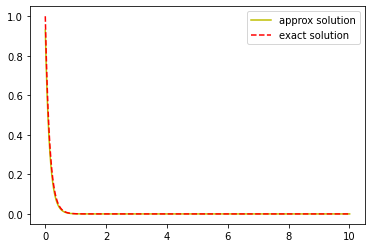

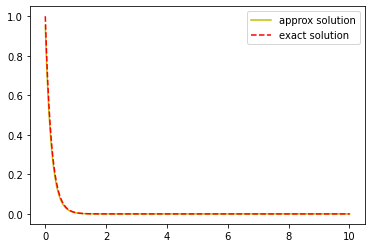

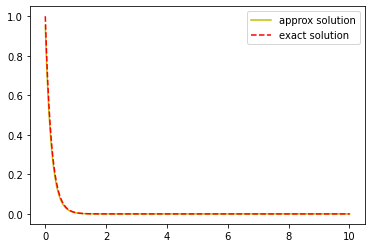

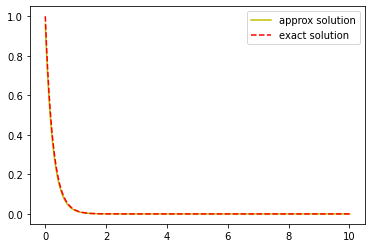

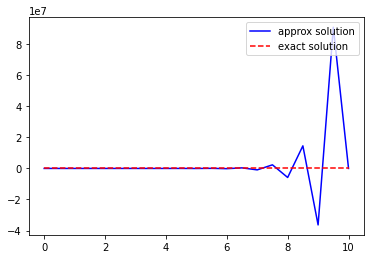

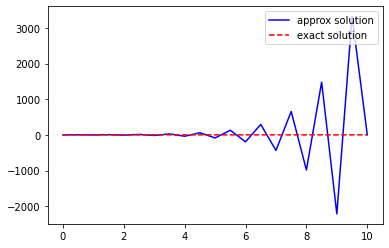

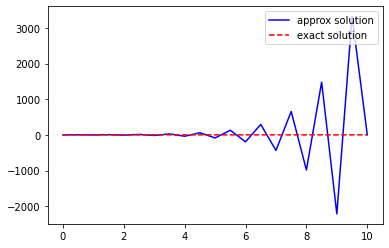

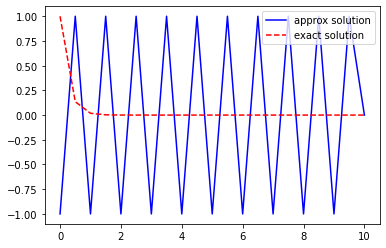

In [123]:
# Case 1: Stability
def f(u,t):
  return lam * u

# Parameters
N = 4

lam = -np.random.randint(1, 10, size=(N,1)) 
print("lambda values: ",lam)
u0 = np.ones((N,1))
T = 10
k = 0.01

# Approximation 
u_n, steps, time = explicit_euler_system(f, u0, 0, T, k)

# Compute exact solution
u_exact = np.zeros((N,round(T/k)+2))
j=0
for t in time:
  for i in range(N):
    u_exact [i][j] = u0[i]*math.exp(lam[i]*t)
  j += 1

# Plot solutions
for i in range(N):
  plt.figure()
  plt.plot(time, steps[i][:], "y",label= "approx solution")
  plt.plot(time, u_exact[i][:], "r--",label= "exact solution")
  plt.legend(loc="upper right")

plt.show()

#_____________________________________________
# Case 2: No stability
k = 0.5

# Approximation 
u_n, steps, time = explicit_euler_system(f, u0, 0, T, k)

# Compute exact solution
u_exact = np.zeros((N,round(T/k)+1))
j=0
for t in time:
  for i in range(N):
    u_exact [i][j] = u0[i]*math.exp(lam[i]*t)
  j += 1

# Plot solutions
for i in range(N):
  plt.figure()
  plt.plot(time, steps[i][0:-1], "b",label= "approx solution")
  plt.plot(time, u_exact[i][:], "r--",label= "exact solution")
  plt.legend(loc="upper right")

plt.show()

As expected, on the first 4 plots, the approximated solution is very close to the exact solution. We cannot say the same in the 4 last plots, where the perturbation soon becomes very large, giving a very bad approximated solution.

# **Discussion**

We have implemented time stepping methods for the approximation of the solution of scalar and systems of initial values problem. The chosen method here was the explicit Euler method, for simplicity of the implementation. However, for the chosen test case function, we see that this methods does not guarantee the stability and therefore the parameters k and λ must be chosen carefully. 

Alternatives implementations would have been the backward Euler method or the trapezoidal method. A possibility would have been to implement the theta method, that would allow us to compare the 3 different methods by only modifying the value of θ: if we set θ = 1, we get the explicit Euler method,  θ = 0 leads to the implicit Euler method and θ = 0.5 to the trapezoidal method.